# FIXME

1. [ ] Clean up the file
  - [x] Clean up the imports
  - [ ] Clean up the helper functions - ultimately these should use the libraries
  - [ ] Clean up the plots
  - [ ] Experiment with using a rational function for the plot
2. [ ] Figure out exactly which variables need to be swept over
3. [ ] Write the sweeping logic and sanity check it
4. [ ] Write the naive interpolation logic
5. [ ] Measure the error for random points on the interpolation space

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg.special_matrices import math
from scipy.optimize import curve_fit

In [3]:
def calc_k_const(share_reserves, bond_reserves, share_price, init_share_price, time_remaining):
    """Returns the 'k' constant variable for trade mathematics"""
    scale = share_price / init_share_price
    return scale * (init_share_price * share_reserves) ** (1 - time_remaining) + (bond_reserves) ** (
        1 - time_remaining
    )

def calc_bond_reserves(share_reserves, apr, share_price, init_share_price, time_remaining):
    return (init_share_price * share_reserves) * (1 + apr * time_remaining) ** (1 / time_remaining)
    
# FIXME: This doesn't incorporate fees
def calc_max_loss(share_reserves, bond_reserves, d_bonds, share_price, init_share_price, time_remaining):
    k = calc_k_const(share_reserves, bond_reserves, share_price, init_share_price, time_remaining)
    d_shares = share_reserves - (1 / init_share_price) * ((init_share_price / share_price) * (k - (bond_reserves + d_bonds) ** (1 - time_remaining))) ** (1 / (1 - time_remaining))
    return d_bonds - d_shares
def calc_max_loss_from_apr(share_reserves, bond_percentage, apr, share_price, init_share_price, time_remaining):
    bond_reserves = calc_bond_reserves(share_reserves, apr, share_price, init_share_price, time_remaining)
    d_bonds = bond_reserves * bond_percentage
    return calc_max_loss(share_reserves, bond_reserves, d_bonds, share_price, init_share_price, time_remaining)    

In [4]:
# FIXME: We may not need to sweep over c, mu, and z.
# Simulation Variables
c = 1           # share price
mu = 1          # init share price
z = 10**6       # share reserves -- this is arbitrary for this analysis
apr = 0.2       # apr
t = 0.5         # time remaining
y_percent = 0.1 # percent of bond reserves to be shorted

# Other Variables
verbose = False

In [5]:
x = []
y = []
for y_percent in [0.01 * x for x in range(0, 101)]:
    max_loss = calc_max_loss_from_apr(z, y_percent, apr, c, mu, t)
    max_loss_percent = (max_loss / z) * 100
    x.append(y_percent * 100)
    y.append(max_loss_percent)
    if verbose:
      print(
          f"y_percent = {y_percent}"
          f"\n\tmax_loss = {max_loss}"
          f"\n\tmax_loss_percent = {max_loss_percent}"
      )

In [6]:
def objective(xp,a,b):
    return a * xp ** b

# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b = popt
print('y = %.5f /( %.5f * x)' % (a, b))

y = 0.03961 /( 1.55309 * x)


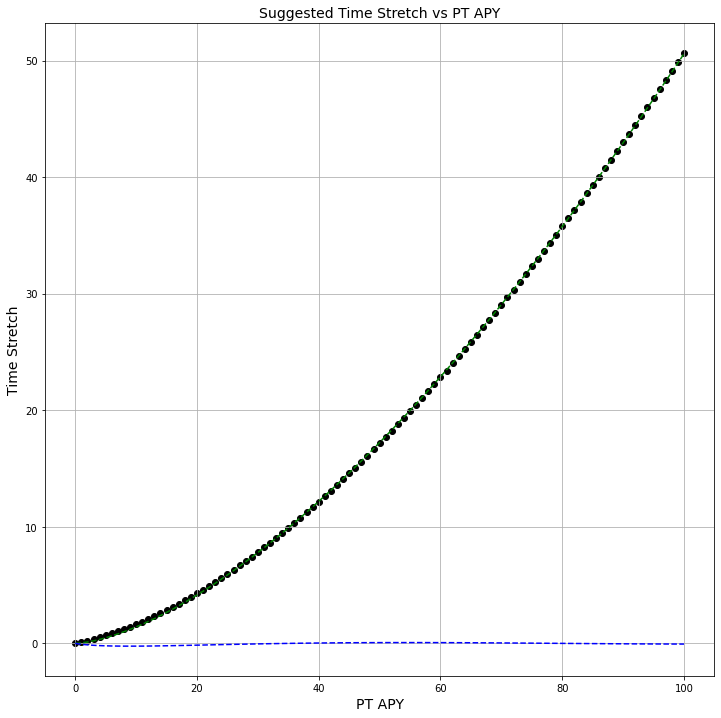

In [7]:


plt.subplots(figsize=(12,12))
#plt.yticks(np.arange(0,41, 1))
#plt.xticks(np.arange(0,51, 1))
#plt.errorbar(apys, mean_tss, yerr=err_tss, fmt='o', color='black',
#             ecolor='red', elinewidth=3, capsize=0);
plt.scatter(x,y,color='black')
plt.grid(True)
plt.title('Suggested Time Stretch vs PT APY', fontsize=14)
plt.xlabel('PT APY', fontsize=14)
plt.ylabel('Time Stretch', fontsize=14)

x_plot = np.array(x)
y_plot = objective(x, a, b)
plt.plot(x_plot, y_plot, '--', color="green")
plt.plot(x_plot, y_plot - y, '--', color="blue")

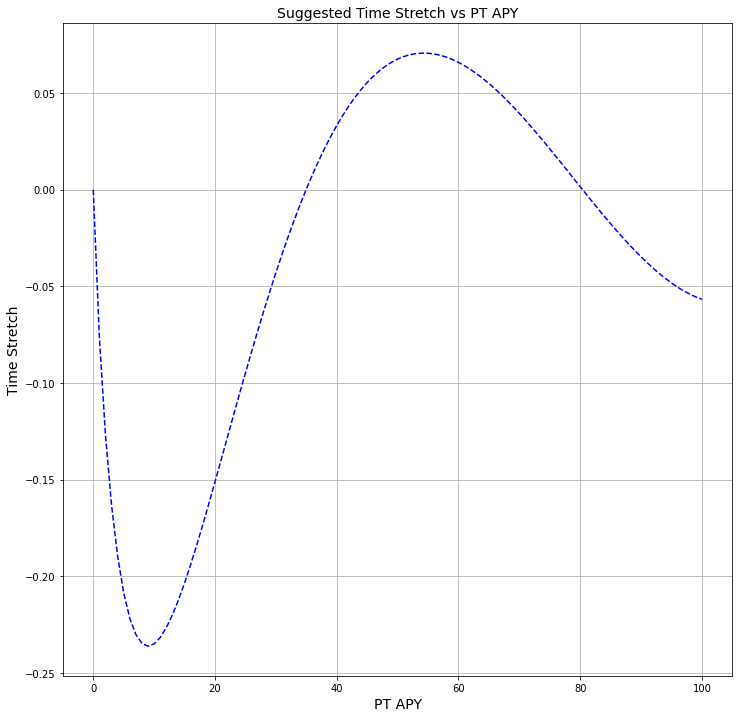

In [8]:
plt.subplots(figsize=(12,12))
#plt.yticks(np.arange(0,41, 1))
#plt.xticks(np.arange(0,51, 1))
#plt.errorbar(apys, mean_tss, yerr=err_tss, fmt='o', color='black',
#             ecolor='red', elinewidth=3, capsize=0);
#plt.scatter(x,y,color='black')
plt.grid(True)
plt.title('Suggested Time Stretch vs PT APY', fontsize=14)
plt.xlabel('PT APY', fontsize=14)
plt.ylabel('Time Stretch', fontsize=14)

x_plot = np.array(x)
y_plot = objective(x, a, b)
#plt.plot(x_plot, y_plot, '--', color="green")
plt.plot(x_plot, y_plot - y, '--', color="blue")

In [9]:
def error_objective(xp,a,b,c,d,e):
    return a * xp ** 4 + b * xp ** 3 + c * xp ** 2 + d * xp ** 1 + e 

# curve fit
popt, _ = curve_fit(error_objective, x, y_plot - y)
# summarize the parameter values
c, d, e, f, g = popt
print('y = %.5f /( %.5f * x)' % (a, b))

y = 0.03961 /( 1.55309 * x)


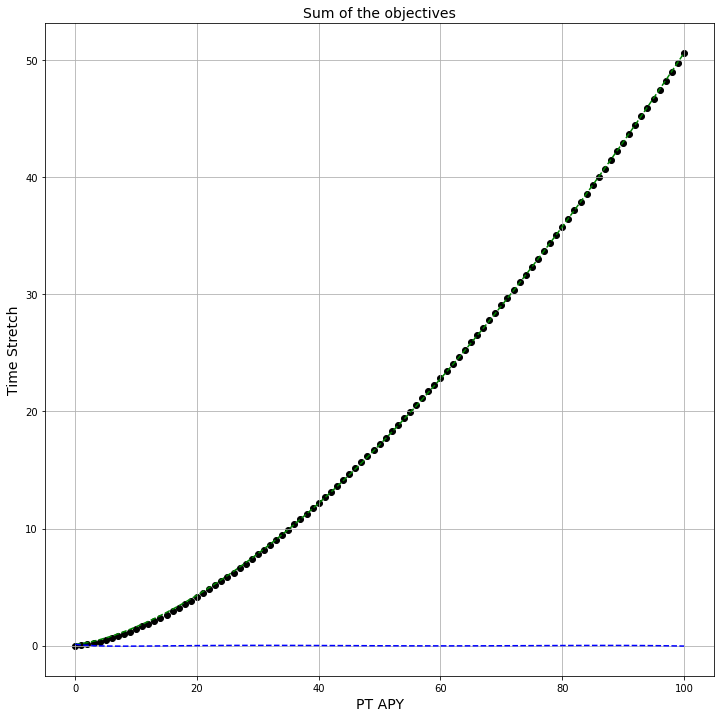

In [10]:
plt.subplots(figsize=(12,12))
#plt.yticks(np.arange(0,41, 1))
#plt.xticks(np.arange(0,51, 1))
#plt.errorbar(apys, mean_tss, yerr=err_tss, fmt='o', color='black',
#             ecolor='red', elinewidth=3, capsize=0);
plt.scatter(x,y_plot,color='black')
plt.grid(True)
plt.title('Sum of the objectives', fontsize=14)
plt.xlabel('PT APY', fontsize=14)
plt.ylabel('Time Stretch', fontsize=14)

y_plot_2 = objective(x_plot, a, b) - error_objective(x_plot, c, d, e, f, g)
plt.plot(x_plot, y_plot_2, '--', color="green")
plt.plot(x_plot, y_plot_2 - y, '--', color="blue")

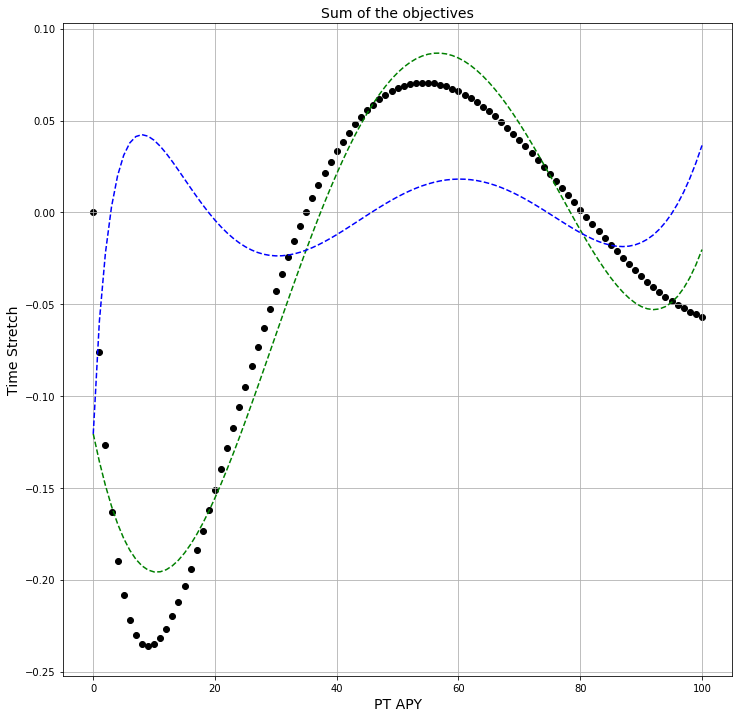

In [11]:
plt.subplots(figsize=(12,12))
#plt.yticks(np.arange(0,41, 1))
#plt.xticks(np.arange(0,51, 1))
#plt.errorbar(apys, mean_tss, yerr=err_tss, fmt='o', color='black',
#             ecolor='red', elinewidth=3, capsize=0);
plt.scatter(x,y_plot - y,color='black')
plt.grid(True)
plt.title('Sum of the objectives', fontsize=14)
plt.xlabel('PT APY', fontsize=14)
plt.ylabel('Time Stretch', fontsize=14)

y_plot_3 = error_objective(x_plot, c, d, e, f, g)
plt.plot(x_plot, y_plot_3, '--', color="green")
plt.plot(x_plot, y_plot_3 - (y_plot - y), '--', color="blue")

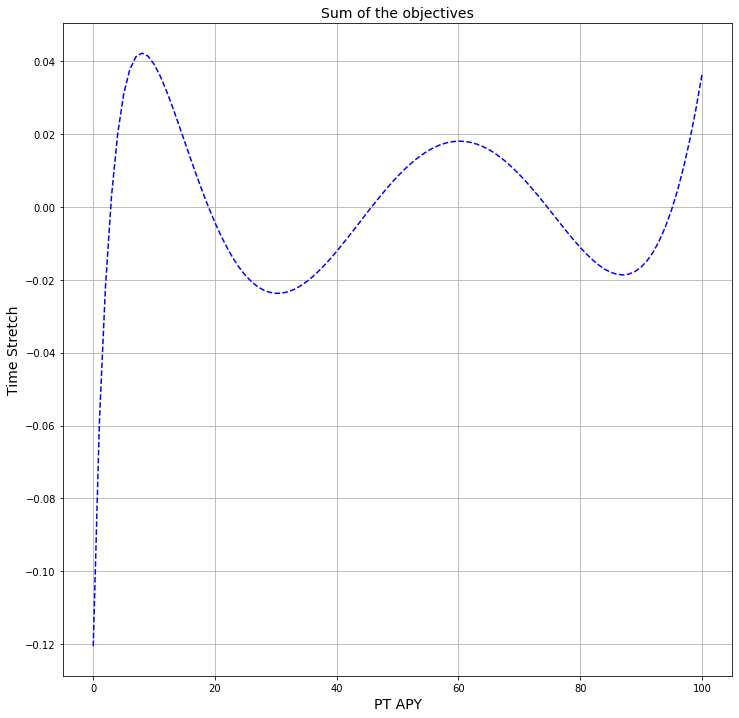

In [12]:
plt.subplots(figsize=(12,12))
#plt.yticks(np.arange(0,41, 1))
#plt.xticks(np.arange(0,51, 1))
#plt.errorbar(apys, mean_tss, yerr=err_tss, fmt='o', color='black',
#             ecolor='red', elinewidth=3, capsize=0);
#plt.scatter(x,y,color='black')
plt.grid(True)
plt.title('Sum of the objectives', fontsize=14)
plt.xlabel('PT APY', fontsize=14)
plt.ylabel('Time Stretch', fontsize=14)

#y_plot_3 = objective(x_plot, a, b) - error_objective(x_plot, c, d, e, f)
#plt.plot(x_plot, y_plot_3, '--', color="green")
plt.plot(x_plot, y_plot_3 - (y_plot - y), '--', color="blue")